# data

> data utils

[![](https://raw.githubusercontent.com/butchland/fastai-torchgeo/master/assets/colab.svg)](https://colab.research.google.com/github/butchland/fastai-torchgeo/blob/master/nbs/01_data.ipynb)

In [ ]:
#| default_exp data

In [ ]:
#| hide
# check if in colab and install package as needed
![ -e /content ] && ! pip show fastai-torchgeo && pip install git+https://github.com/butchland/fastai-torchgeo.git
![ -e /content ] && ! pip show nbdev && pip install nbdev

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| exporti
import fastai.vision.all as fv
from fastai_torchgeo.core import GeoTensorImage
from functools import partial

In [ ]:
#| export
def GeoImageBlock(chnls_first=True):
    return fv.TransformBlock(type_tfms=partial(GeoTensorImage.create,chnls_first=chnls_first))
                             

In [ ]:
from torchgeo.datamodules import EuroSATDataModule
from torchgeo.datasets import EuroSAT100

In [ ]:
dblock = fv.DataBlock(blocks=(GeoImageBlock(), fv.CategoryBlock()),
                      get_items=fv.get_image_files,
                      splitter=fv.RandomSplitter(valid_pct=0.1, seed=42),
                      get_y=fv.parent_label,
                      item_tfms=fv.Resize(64),
                      batch_tfms=[fv.Normalize.from_stats(EuroSATDataModule.mean, EuroSATDataModule.std)],
                     )

In [ ]:
sat_path = fv.untar_data(EuroSAT100.url)

Setting-up type transforms pipelines
Found 100 items
2 datasets of sizes 90,10
Setting up Pipeline: partial
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: partial
    starting from
      /home/butch2/.fastai/data/EuroSAT100/images/remote_sensing/otherDatasets/sentinel_2/tif/Industrial/Industrial_1906.tif
    applying partial gives
      GeoTensorImage of size 13x64x64
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /home/butch2/.fastai/data/EuroSAT100/images/remote_sensing/otherDatasets/sentinel_2/tif/Industrial/Industrial_1906.tif
    applying parent_label gives
      Industrial
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(4)

Final sample: (GeoTensorImage: torch.Size([13, 64, 64]), TensorCategory(4))


Found 100 items
2 datasets of sizes 90,10
Setting up Pipeline: partial
Setting up

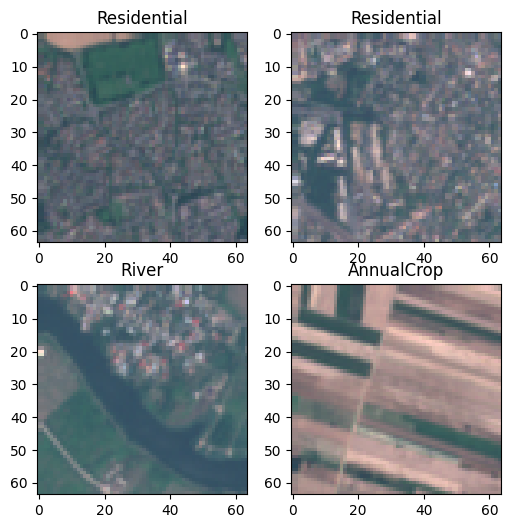

In [ ]:
dblock.summary(sat_path, show_batch=True)

In [ ]:
dls = dblock.dataloaders(sat_path, bs=64)

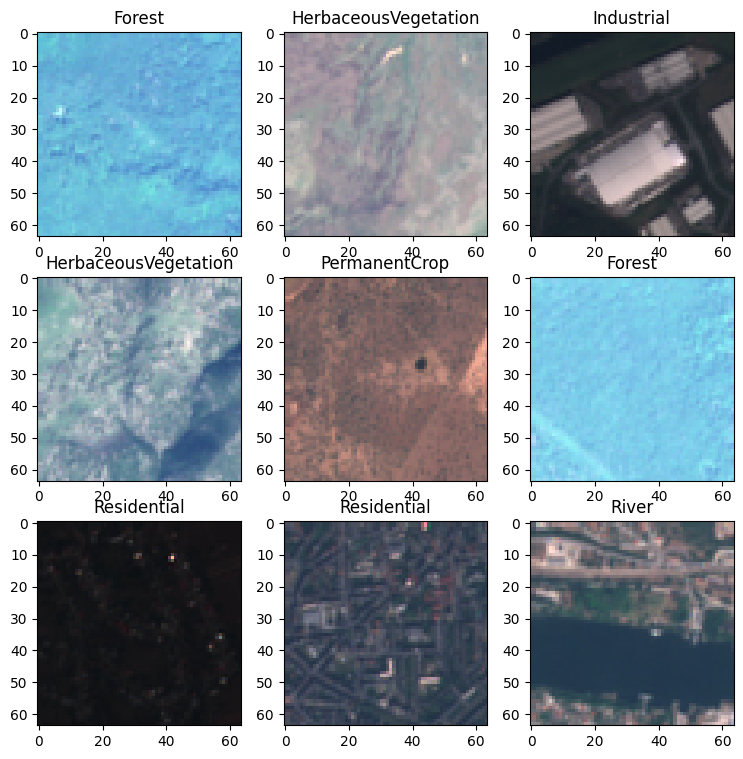

In [ ]:
dls.show_batch()